In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer

In [2]:
data = pd.read_csv('C:/Users/ASUS/Documents/GitHub/NAACP_summer2021/Entity_Recognition/People_Covered_in_the_News/people_2018.csv')
lemmatizer = WordNetLemmatizer()

In [3]:
def custom_standardization(df):

    spec_chars = ["!",'"',"#","%","&","'","(",")", "*","+",",",
                  "-",".","/",":",";","<", "=",">","?","@","[",
                  "\\","]","^","_", "`","{","|","}","~","–", 
                  "\xc2", "\xa0", "\x80", "\x9c", "\x99", "\x94", 
                  "\xad", "\xe2", "\x9d", "\n", "x9d", "xc2", "xa0", "x80", "x9c", "x99", "x94", 
                  "xad", "xe2"]

    for char in spec_chars:
        df['article'] = df['article'].str.strip()
        #data['text'] = str(data['text']).lower()
        df['article'] = df['article'].str.replace(char, ' ')
        #data['text'] = stemmer.stem(str(data['text']))
        
    return df

data = custom_standardization(data)

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,last_name,article,article_id,race
0,Auerbach,But — that reason being to honor the contribu...,2018_495,white
1,Carlson,but there’s never been a film about him or any...,2018_2099,white
2,Terriers,The play by play announcer for the game is Vin...,2018_2981,white
3,Harper,Changes were made the team’s racial diversity...,2018_5190,white
4,Gronk,The Sox don’t need the city’s permission to ma...,2018_683,white


In [5]:
data.columns = ['last_name', 'sentence', 'article_id', 'race']
data.head()

,last_name,sentence,article_id,race
0,Auerbach,But — that reason being to honor the contribu...,2018_495,white
1,Carlson,but there’s never been a film about him or any...,2018_2099,white
2,Terriers,The play by play announcer for the game is Vin...,2018_2981,white
3,Harper,Changes were made the team’s racial diversity...,2018_5190,white
4,Gronk,The Sox don’t need the city’s permission to ma...,2018_683,white


white
Lemmatizing done


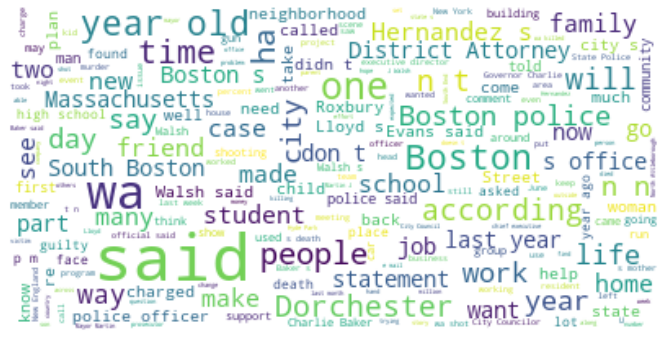

black
Lemmatizing done


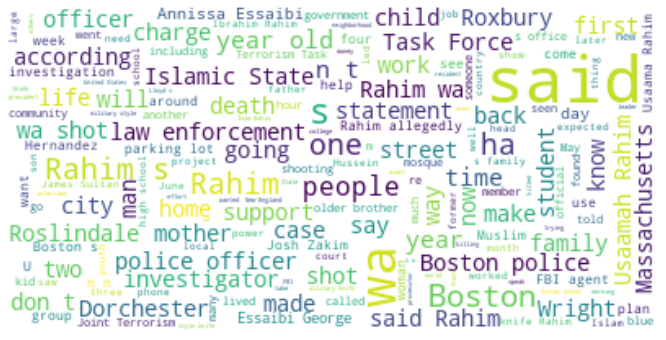

hispanic
Lemmatizing done


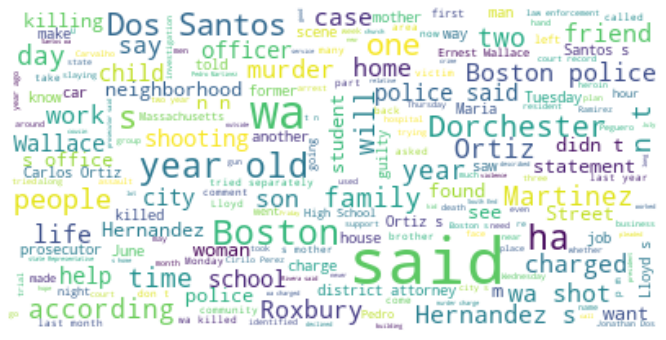

api
Lemmatizing done


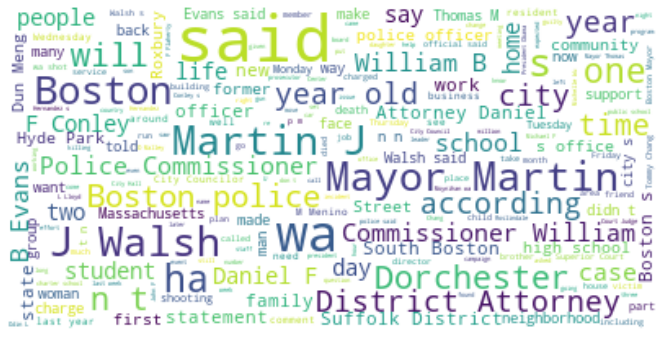

In [6]:
race_groups = data.groupby(data.race)
races = ['white', 'black', 'hispanic', 'api']

for i in range(len(data.race.unique())):
    temp = race_groups.get_group(races[i])
    print(races[i])
    
    documents = ''
    for j in range(len(temp.index)):
        words = temp.iloc[j]['sentence'].split()
        for word in words:
            documents = documents + ' ' + lemmatizer.lemmatize(word)
    print('Lemmatizing done')
    
    wordcloud = WordCloud(max_font_size=40, background_color='white').generate(documents)
    plt.figure(figsize=(15, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.savefig('Black_Ents_Clouds/cloud_2018.png')
    wordcloud.to_file('C:/Users/ASUS/Documents/Github/NAACP_summer2021/Entity_Recognition/Most_Common_Words_Diff_Races/2018/' + races[i] + '.png')
    plt.show()

In [7]:
len(race_groups.get_group('white'))

85762